##  Development of Machine Learning Algorithms for stroke prediction


###  Installing the Required Libraries


In [1]:
#pip install imbalanced-learn --user


#pip install imblearn --user

In [2]:

#pip install dython --user



### Importing the Required Python Libraries

In [3]:
# Loading Python modules

import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)


from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

### Loading the Dataset

##### Reading the stroke prediction CSV dataset gotten from kaggle and isolating the dependent variable which is the stroke column.
##### Pandas was used to import the data and analyse it using descriptive statistics and data visualisation after downloading the csv file from the URL to my local disc.


In [4]:
# Load dataset from local disc (for Juypter notebook)

data = pd.read_csv('C:/Users/HP/Documents/Sam/Greenwich University/Term 2/Project/New folder/healthcare-dataset-stroke-data.csv')
target = data['stroke']

### Begining with Data Quality Assessment and Exploratory Data Analysis


### Viewing the dataset 

In [5]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Displaying the summary information about the dataset and the first 30 rows

In [6]:
# Displaying the summary information about the dataframe
data.info()

# This displays the first 30 rows of a dataframe.
data.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


From the rows displayed above, we can see that there are row with NaN which means Not a Number, It is not the same as 0. Python replaces empty/missing fields in the data with "NaN".

In [7]:
# Summary statistics for numerical features
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Getting the length of the dataset, which informs us how many data points we have.
print(f'Length of data: {len(data)}')

Length of data: 5110


#### Recognizing columns with missing values since missing values can severely affect prediction accuracy, this step needs to be given priority. We will first count the number of missing data (or NaN values) in each feature using Pandas' isna() function.

In [9]:
# Number of missing values per column or checking null values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Removing the Column not Required

##### Removing the "id" column, which is not needed based on the task requirement. As a result, eliminating data will remove data from the dataset that is irrelevant. It makes use of the dropna pandas function ().


In [10]:

data = data.drop(['id'], axis = 1)

### FURTHER EXPLORATORY DATA ANALYSIS (EDA)

### Pairplot showing the correlation relationship between all the variables of the data frame



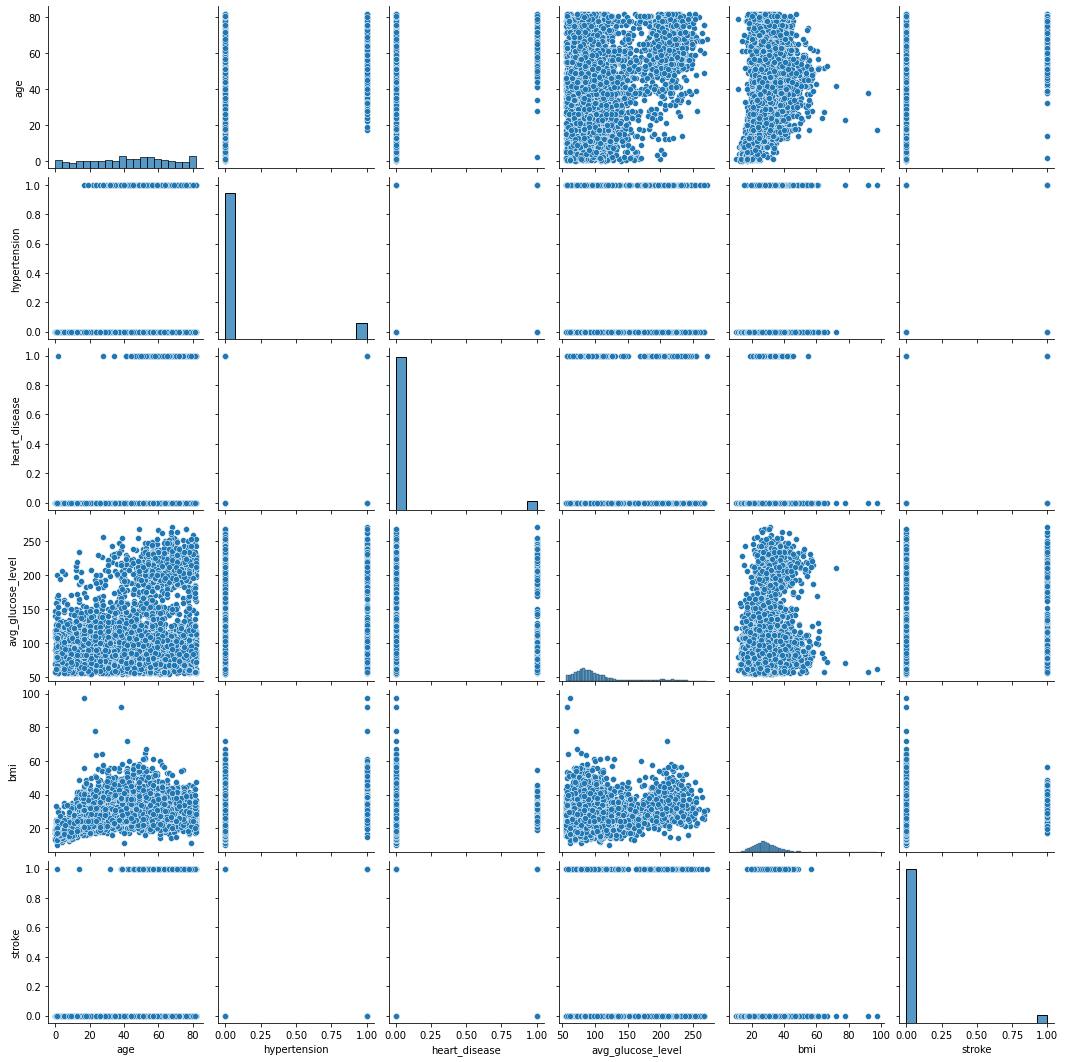

In [11]:
sns.pairplot(data)

### A plot showing the distribution of data in the dependent variable, 'target'

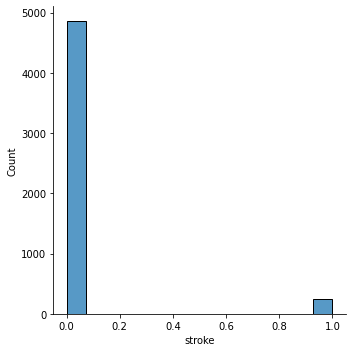

In [12]:
sns.displot(target)

It is found that there is a great imbalance in the binary target variables.

In [13]:
# In order to determine the characteristics of the target data, skewness and kurtosis was implemented
# Skewness measures if the data is symmetrical or not
# positive skewness is observed meaning that the distribution of the target variable is asymetric and has a tail to the right.


print("Skewness: %f" % target.skew())

Skewness: 4.193284


In [14]:
# Kurtosis measures how much the tailin the distribution curveis tailed relative to the normal distribution curve
# A positive kurtosis is observed which indicates that the tail of the skewed distribution of the target variable is very heavy
print("kurtosis: %f" % target.kurt())

kurtosis: 15.589736


<AxesSubplot:>

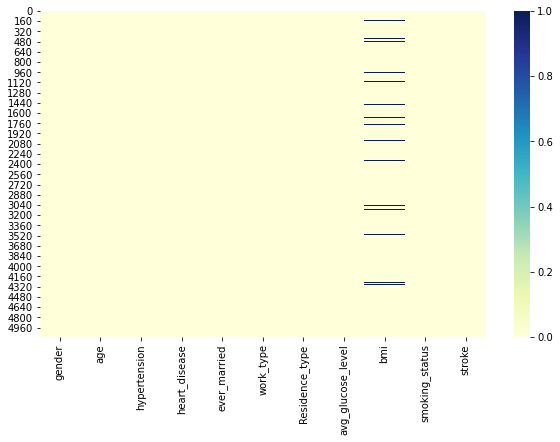

In [15]:
# The following heatmap graph depicts the missing data patterns of the first 11 features.
# The feature name is shown on the horizontal axis, while the number of observations/rows is shown on the vertical axis.
# The dark blue colour signifies missing data, whereas the cream colour represents features without missing values

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap="YlGnBu")

#### The KNNImputer is used to fill in missing values in a dataset using the k-Nearest Neighbors method. 
#### KNN algorithm is used for classification and prediction problems. 
#### The KNNImputer predicts the value of a missing value by calcuting the mean of the bmi of its nearest neighours in related columns.

In [16]:
# Select only the numeric columns and store in train_num, using fit_transform, replace empty values, 
# and then the numerical columns is converted back to a dataframe

data['bmi'].value_counts()
data['bmi'].describe()
knn = KNNImputer()

train_num = data.select_dtypes(np.number)

#train_num is the dataframe that contains the empty values that would be fitted and transformed by the knn imputer
train_num_transformed = knn.fit_transform(train_num)
train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)

#### Excluding the hypertension, heart_disease and stroke columns from the data1 dataframe because they contain only 0s and 1s, therefore there is no need to visualize them using boxplots

In [17]:
data1 = data.loc[:, ~data.columns.isin(['hypertension', 'heart_disease', 'stroke'])]

In [18]:
data1

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,Yes,Private,Rural,166.29,25.6,formerly smoked


#### Boxplot for all the numeric variables found in the new dataframe created called data1 from which hypertension, heart_disease and stroke were removed

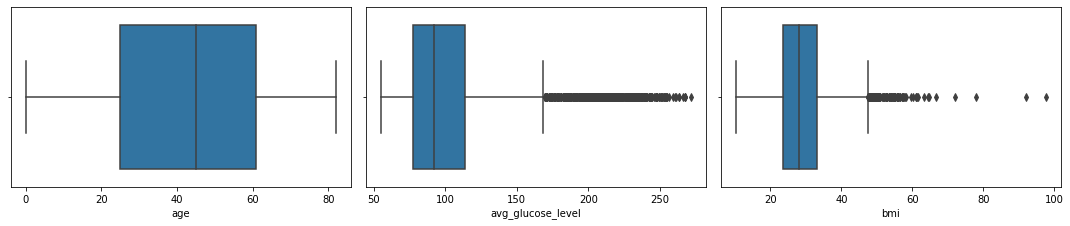

In [19]:
cols = 3
rows = 3
num_cols = data1.select_dtypes(exclude='object').columns
num_cols = num_cols
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [20]:
numerical_feature = ['age', 'avg_glucose_level', 'bmi']

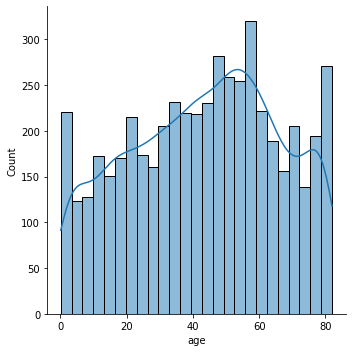

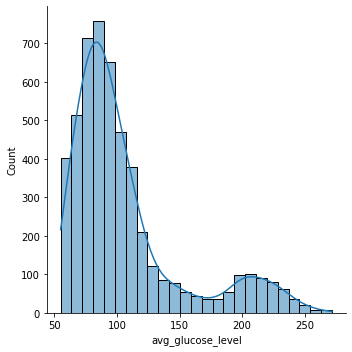

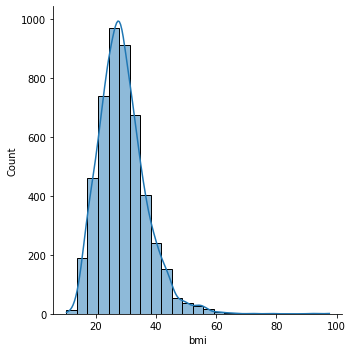

In [21]:
# A plot showing the distribution of the numerical feature

for feature in numerical_feature:
    sns.displot(data[feature], kde=True, bins=25)

###### skewness of bmi before treatment

In [22]:
print("Skewness: %f" % data['bmi'].skew())

Skewness: 1.055340


###### np.log is used to find the natural log of the bmi column which in turn treats the skewness of the bmi column. It is used to normalize the values of the numerical features

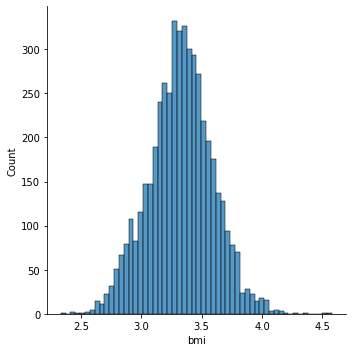

In [23]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])

###### skewness of bmi after treatment

In [24]:
print("Skewness: %f" % data['bmi'].skew())

Skewness: 0.001133


###### np.log is used to find the natural log of the avg_glucose_level column which in turn treats the skewness of the avg_glucose_level column

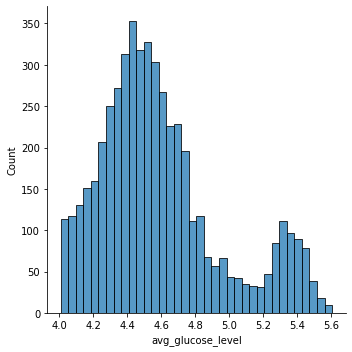

In [25]:
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

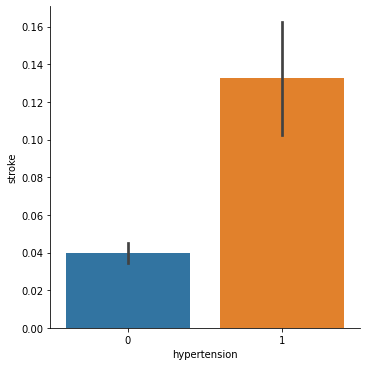

In [26]:
### Tranfering the Content in the dataframe called data to a new data called data2. 

data2 = data
sns.catplot(x="hypertension", y="stroke", kind="bar", data=data2)

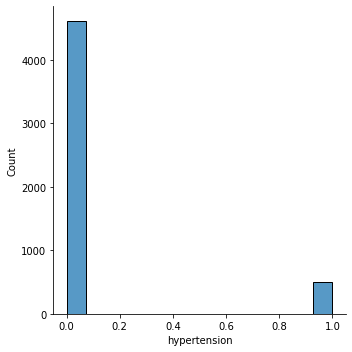

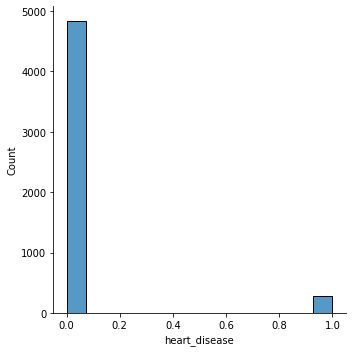

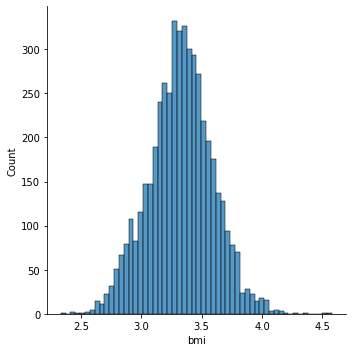

In [27]:
#### Distribution plot to view the hypertension, heart_disease and the bmi imblances

sns.displot(data2.hypertension)
sns.displot(data2.heart_disease)
sns.displot(data['bmi'])

##### Identifying the categorical features which is sometimes referred to as nominal data

In [28]:
categorical_features = identify_nominal_columns(data)
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### Correlation matrix to discover features that correlate with each other

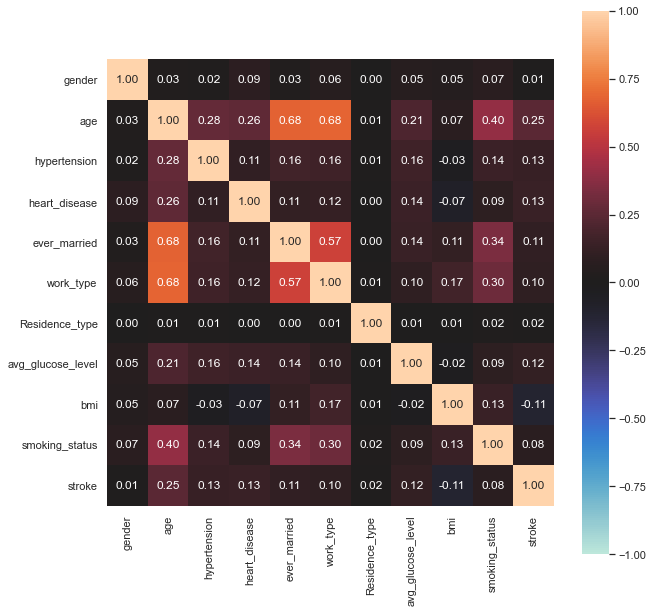

In [29]:
sns.set(font_scale = 1.0)
complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(10,10))

#### Selecting the categorical variables from 'data' dataframe and store them in 'train_obj'

In [30]:
## this is to select the object datatypes (catagorical datatypes)
train_obj = data.select_dtypes('object')

#### Combine the numerical, train_num dataframe and the categorical, train_obj dataframe in one dataframe called data

In [32]:
data = pd.concat([train_num, train_obj], axis=1)

In [33]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,228.69,36.60,1.0,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,202.21,31.38,1.0,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,105.92,32.50,1.0,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,171.23,34.40,1.0,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,174.12,24.00,1.0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,27.12,0.0,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,125.20,40.00,0.0,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,82.99,30.60,0.0,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,166.29,25.60,0.0,Male,Yes,Private,Rural,formerly smoked


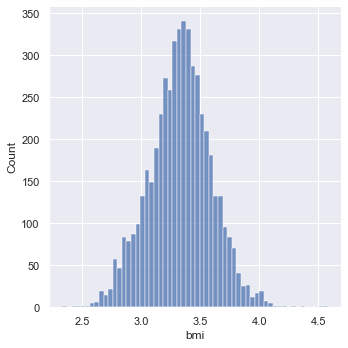

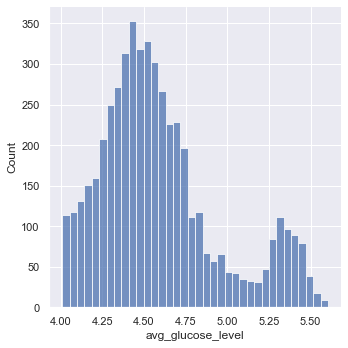

In [34]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

In [35]:
# This show the distribution of the data 
data['bmi'].describe()

count    5110.000000
mean        3.330965
std         0.262385
min         2.332144
25%         3.165475
50%         3.339322
75%         3.499533
max         4.580877
Name: bmi, dtype: float64

In [36]:
## This is to display that there no empty values in the bmi column

data['bmi'].isnull().sum()

0

In [37]:
## This is to display that there no empty values in the dataframe
data.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

In [39]:
data['avg_glucose_level'].describe()

count    5110.000000
mean        4.592465
std         0.361985
min         4.009513
25%         4.346982
50%         4.520538
75%         4.736988
max         5.604846
Name: avg_glucose_level, dtype: float64

#### Vertical bar chart to show the distribution of unique categories in the categorical variables

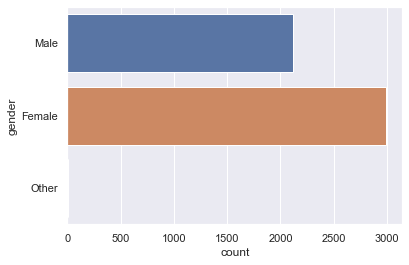

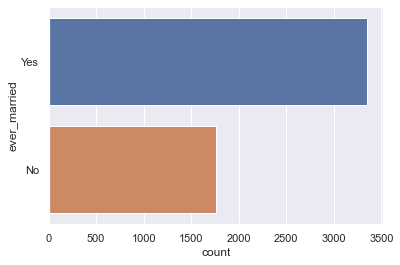

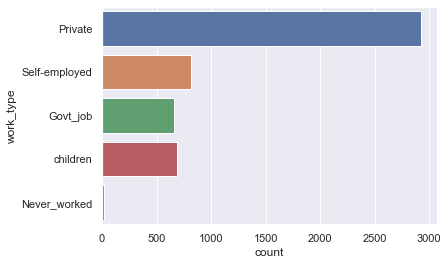

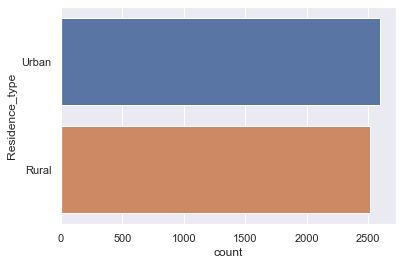

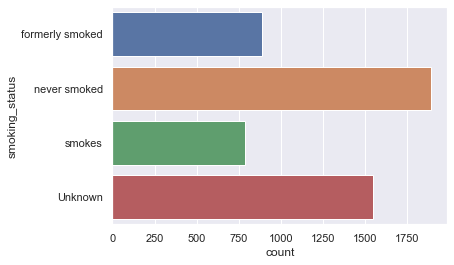

In [40]:
for col in train_obj:
    if train_obj[col].nunique() <= 22:
        sns.countplot(y=col, data=train_obj)
        plt.show()

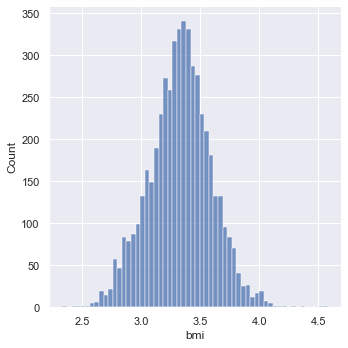

In [41]:
sns.displot(data['bmi'])

#### One hot encoding to convert all categorical variables to binary vectors

In [42]:
#### In order to do this, the categorical values must first be converted to integer numbers. 
#### The index of the integer, which is denoted with a 1, 
#### is then used to represent each integer value as a binary vector with all other values being zero.

data = pd.get_dummies(data)
data_3 = data
data_3

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Transfering all data in the columns except stroke column in the variable X

In [43]:

X = data.loc[:,data.columns != 'stroke']

In [44]:
# Assigning the columns present in X dataframe to a variable feature_names
feature_names = X.columns

In [45]:
# To display the feature names
feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

#### Transfering the content of the target column to Y variable

In [46]:
# Transferring the target column "stroke" to the Y variable 
y = target


In [47]:
# Displaying the X dataframe
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


#### Spliting X and Y dataframes into 75%train dataset and 25% test dataframe

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

#### Synthetic Minority Oversampling Technique, or SOMTE, is a method for evenly boosting the dataset's case number and helps in resolving the issue of overfitting brought on by random oversampling.
#### It aims to balance class distribution by randomly increasing minority class examples by replicating them

In [49]:
# Balancing the imbalanced y_train and x_train using SMOTE() function and storing the result in y_train_3 and x_train_3
smote = SMOTE(random_state = 14)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

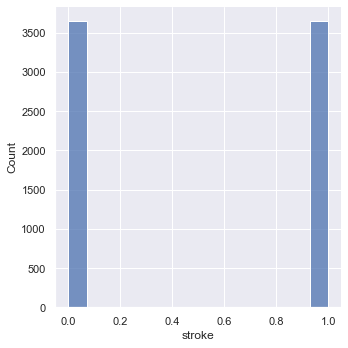

In [50]:
# This is to visualize y_train_3. Due to the SMOTE function, the stroke feature is balanced
sns.displot(y_train_3)

#### Creating an object 'rf' of the RandomForestRegressor class and using it to fit the x-train_3 and y_train_3

In [51]:

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_3, y_train_3)

RandomForestRegressor()

#### A horizontal bar plot showing the importance of the features

<AxesSubplot:>

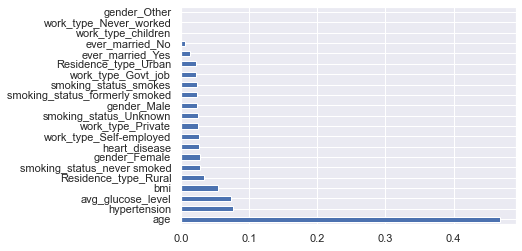

In [52]:
(pd.Series(rf.feature_importances_, index = X.columns).nlargest(21).plot(kind = 'barh'))

In [53]:
#sns.displot(data['bmi'])

In [54]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Transfering all columns in the data dataframe except the stroke column and storing it in balanced_x dataframe

In [55]:
balanced_X = data.loc[:,data.columns != 'stroke']
print (type(balanced_X))

<class 'pandas.core.frame.DataFrame'>


#### Transfering stroke column into series balanced_y

In [56]:
balanced_y = data['stroke']
print (type(balanced_y))


<class 'pandas.core.series.Series'>


#### A plot showing the distribution of data in the dependent variable, 'y_train'

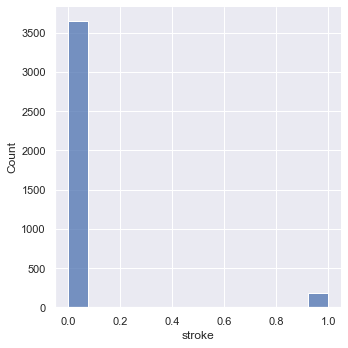

In [57]:
sns.displot(y_train)


#### RandomOverSampler includes adding and replacing samples drawn at random from the minority class to the training dataset. It is used in balacing features.
The random oversampler class is imported from the imblearn.over_sampling, an object of the RandomOverSampler class is created and stored in the variable OS using the fit_resample method of the RandomOverSampler class, resample balanced_X, and balanced_ y such that the lesser data is duplicated to match the amount of the more aboundant data in  both balanced_X and balanced_Y. 



In [58]:
from imblearn.over_sampling import RandomOverSampler
OS=RandomOverSampler()
from collections import Counter
X_os,y_os=OS.fit_resample(balanced_X,balanced_y)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.33,random_state=10)


##### StandardScaler library is imported from sklearn.preprocessing in order to reduce all the numeric values of x_train to the same scale i.e values between 0s and 1s.
##### StandardScaler is used to resize the distribution of the values so that the mean of the observed values is 0 and the standard deviation is 1

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

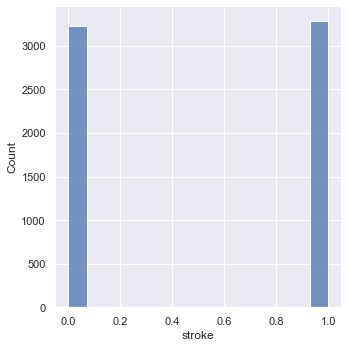

In [61]:
sns.displot(y_train)

#### Creating an object 'logreg' of the LogisticRegressor class and using it to fit the x-train_scaled and y_train_scaled

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

#### Confusion matrix showing a true positive value of 1296 and true negative of 1197, false positive of 437 and false negative of 280

In [63]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1196,  437],
       [ 269, 1307]], dtype=int64)

#### A heatmap showing the previously seen confusion matrix

Text(0.5, 257.44, 'Predicted label')

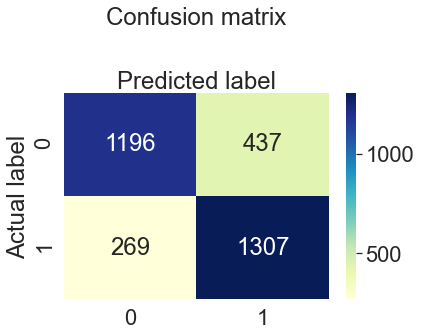

In [64]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 2.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '16'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.3)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
# Evaluation for the confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7799937675288252
Precision: 0.7494266055045872
Recall: 0.8293147208121827


In [66]:
# Evaluation for the confusion matrix 
print("F1_score:",metrics.f1_score(y_test, y_pred))

F1_score: 0.7873493975903614


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


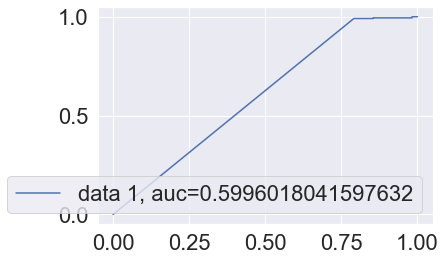

In [67]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### RandomForestClassifier Model

In [68]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([[1591,   42],
       [   0, 1576]], dtype=int64)

In [69]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Text(0.5, 257.44, 'Predicted label')

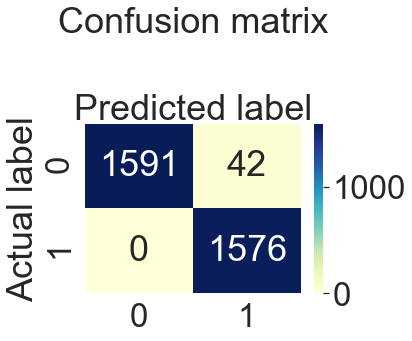

In [70]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.9869118105328762
Precision: 0.9740420271940667
Recall: 1.0


In [72]:
print("F1_score:",metrics.f1_score(y_test, y_pred_rf))

F1_score: 0.9868503443957419


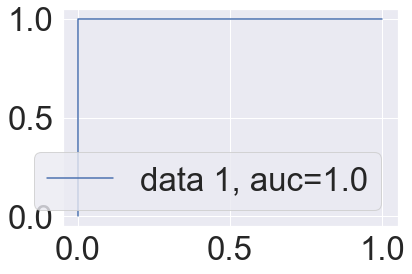

In [73]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Gaussian Navie Bayes Model 

In [74]:

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_nb = gnb.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cnf_matrix

array([[ 397, 1236],
       [  14, 1562]], dtype=int64)

In [75]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Text(0.5, 257.44, 'Predicted label')

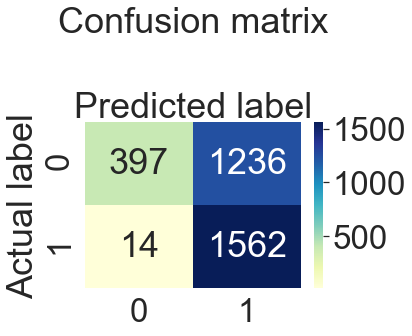

In [76]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))
print("Precision:",metrics.precision_score(y_test, y_pred_nb))
print("Recall:",metrics.recall_score(y_test, y_pred_nb))
print("F1_score:",metrics.f1_score(y_test, y_pred_nb))

Accuracy: 0.610470551573699
Precision: 0.5582558970693352
Recall: 0.9911167512690355
F1_score: 0.7142203932327389


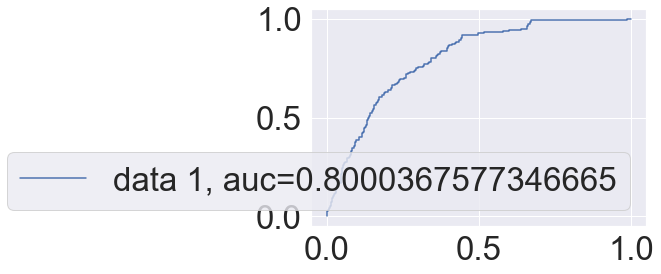

In [78]:
y_pred_proba = gnb.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Tree Classifier 

In [79]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred_dt = clf.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix


array([[1537,   96],
       [   0, 1576]], dtype=int64)

In [80]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Text(0.5, 257.44, 'Predicted label')

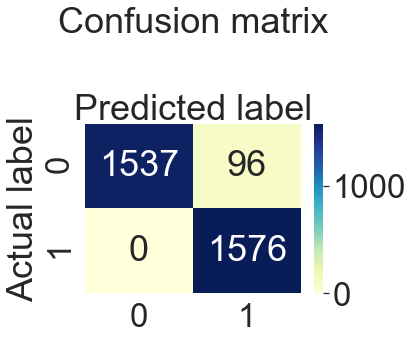

In [81]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
print("F1_score:",metrics.f1_score(y_test, y_pred_dt))

Accuracy: 0.97008413836086
Precision: 0.9425837320574163
Recall: 1.0
F1_score: 0.9704433497536945


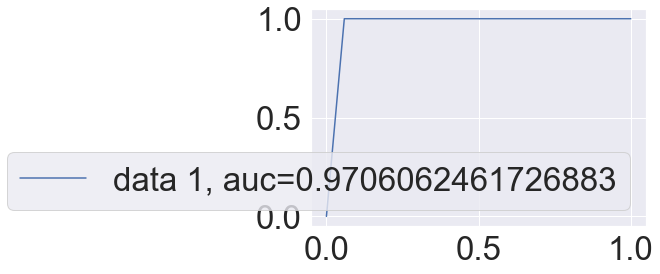

In [83]:
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Stochastic Gradient Descent (SGD) Classifier 

In [84]:
sgdcf = SGDClassifier(loss="hinge", penalty="l2", max_iter=7)
sgdcf.fit(X_train_scaled,y_train)
y_pred_sgd = sgdcf.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_sgd)
cnf_matrix

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[1149,  484],
       [ 533, 1043]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

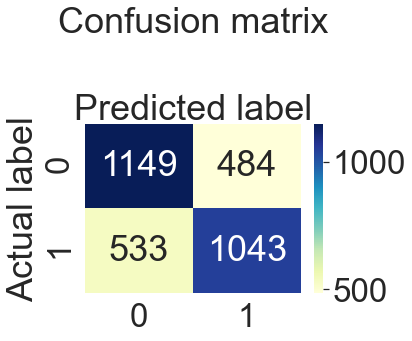

In [85]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sgd))
print("Precision:",metrics.precision_score(y_test, y_pred_sgd))
print("Recall:",metrics.recall_score(y_test, y_pred_sgd))
print("F1_score:",metrics.f1_score(y_test, y_pred_sgd))

Accuracy: 0.6830788407603615
Precision: 0.6830386378519974
Recall: 0.6618020304568528
F1_score: 0.6722526587173704


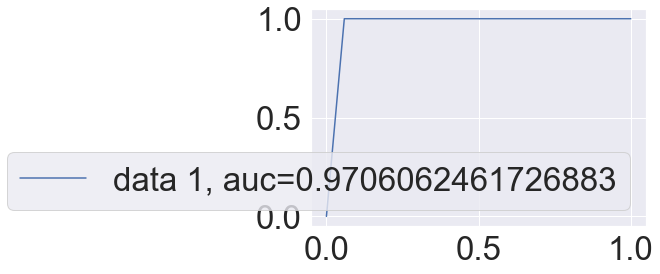

In [87]:
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### K Nearest Neighbours (kNN) Classifier 

In [88]:
knnmod = KNeighborsClassifier(n_neighbors=3)
knnmod.fit(X_train_scaled,y_train)
y_pred_knn= knnmod.predict(X_test_scaled) 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix


array([[1442,  191],
       [   0, 1576]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

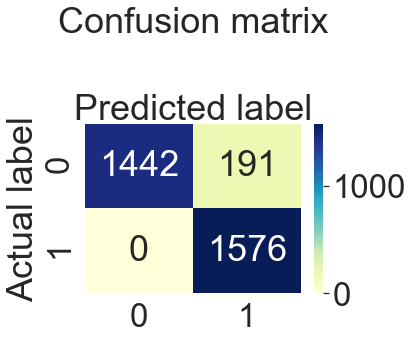

In [89]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.9404799002804612
Precision: 0.8919071873231466
Recall: 1.0
F1_score: 0.9428656895004487


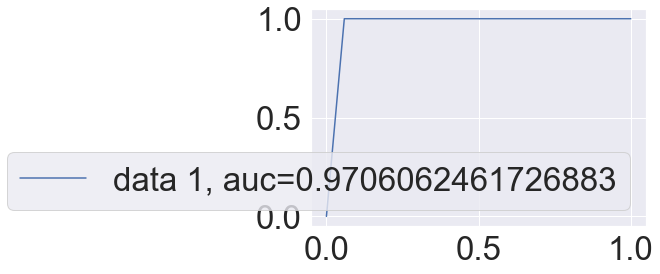

In [91]:
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()